In [58]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy.stats as st
import sys
sys.path.append("..") 
import importlib
import functions.calc_mcf as calc_mcf
import functions.calc_projection as calc_proj

importlib.reload(calc_mcf)
importlib.reload(calc_proj)

dpi = 400

plt.rcParams['figure.dpi'] = dpi
plt.rcParams['savefig.dpi'] = dpi
plt.style.use(['science','ieee'])
plt.rcParams['figure.figsize'] = 5, 5
plt.rcParams["text.usetex"] = False
%matplotlib inline

In [61]:

def readData(file):
    with h5py.File(file, 'r') as data:
        myData = {key: data[key][()] for key in data.keys()}
    return myData

para = readData("../h5_projected/g1040_0016_binary_search_100_fib_main.h5")
para_mcf = readData("../h5_projected/g1040_0016_binary_search_100_fib_mcf.h5")
para_map = readData("../h5_projected/g1040_0016_binary_search_100_fib_map.h5")

perp = readData("../h5_projected/g1041_9015_by_mass_100_fib_main.h5")
perp_mcf = readData("../h5_projected/g1041_9015_by_mass_100_fib_mcf.h5")
perp_map = readData("../h5_projected/g1041_9015_by_mass_100_fib_map.h5")

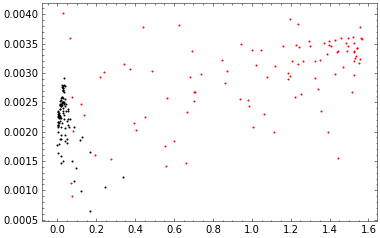

In [63]:
for data in [para, perp]:
    data['b_offset'] = np.abs(data['cloud_orientation'] - data['b_orientation'])
    data['b_offset'][data['b_offset'] > np.pi/2] = np.pi - data['b_offset'][data['b_offset'] > np.pi/2]


plt.scatter(para['b_offset'], para['mcf_slope'], s = 1)
plt.scatter(perp['b_offset'], perp['mcf_slope'], s = 1)
plt.show()

In [67]:
import matplotlib as mpl

norm = mpl.colors.Normalize(vmin = 0, vmax = np.pi/2)
cmap = mpl.cm.ScalarMappable(norm = norm, cmap = mpl.cm.turbo)

ls = ['solid', 'dashed']

b_offsets = [para['b_offset'], perp['b_offset']]
mcfs = [para_mcf['mcf'], perp_mcf['mcf']]
mcf_bins = [para_mcf['mcf_bin'], perp_mcf['mcf_bin']]

fig, ax = plt.subplots(dpi = 100)
for j in range(2):    
    for i in range(100):
        if i%10 == 0:
            ax.plot(mcf_bins[j][i], mcfs[j][i], ls = ls[j], c = cmap.to_rgba(b_offsets[j][i]))

fig.colorbar(cmap)
ax.set_yscale('log')
plt.show()

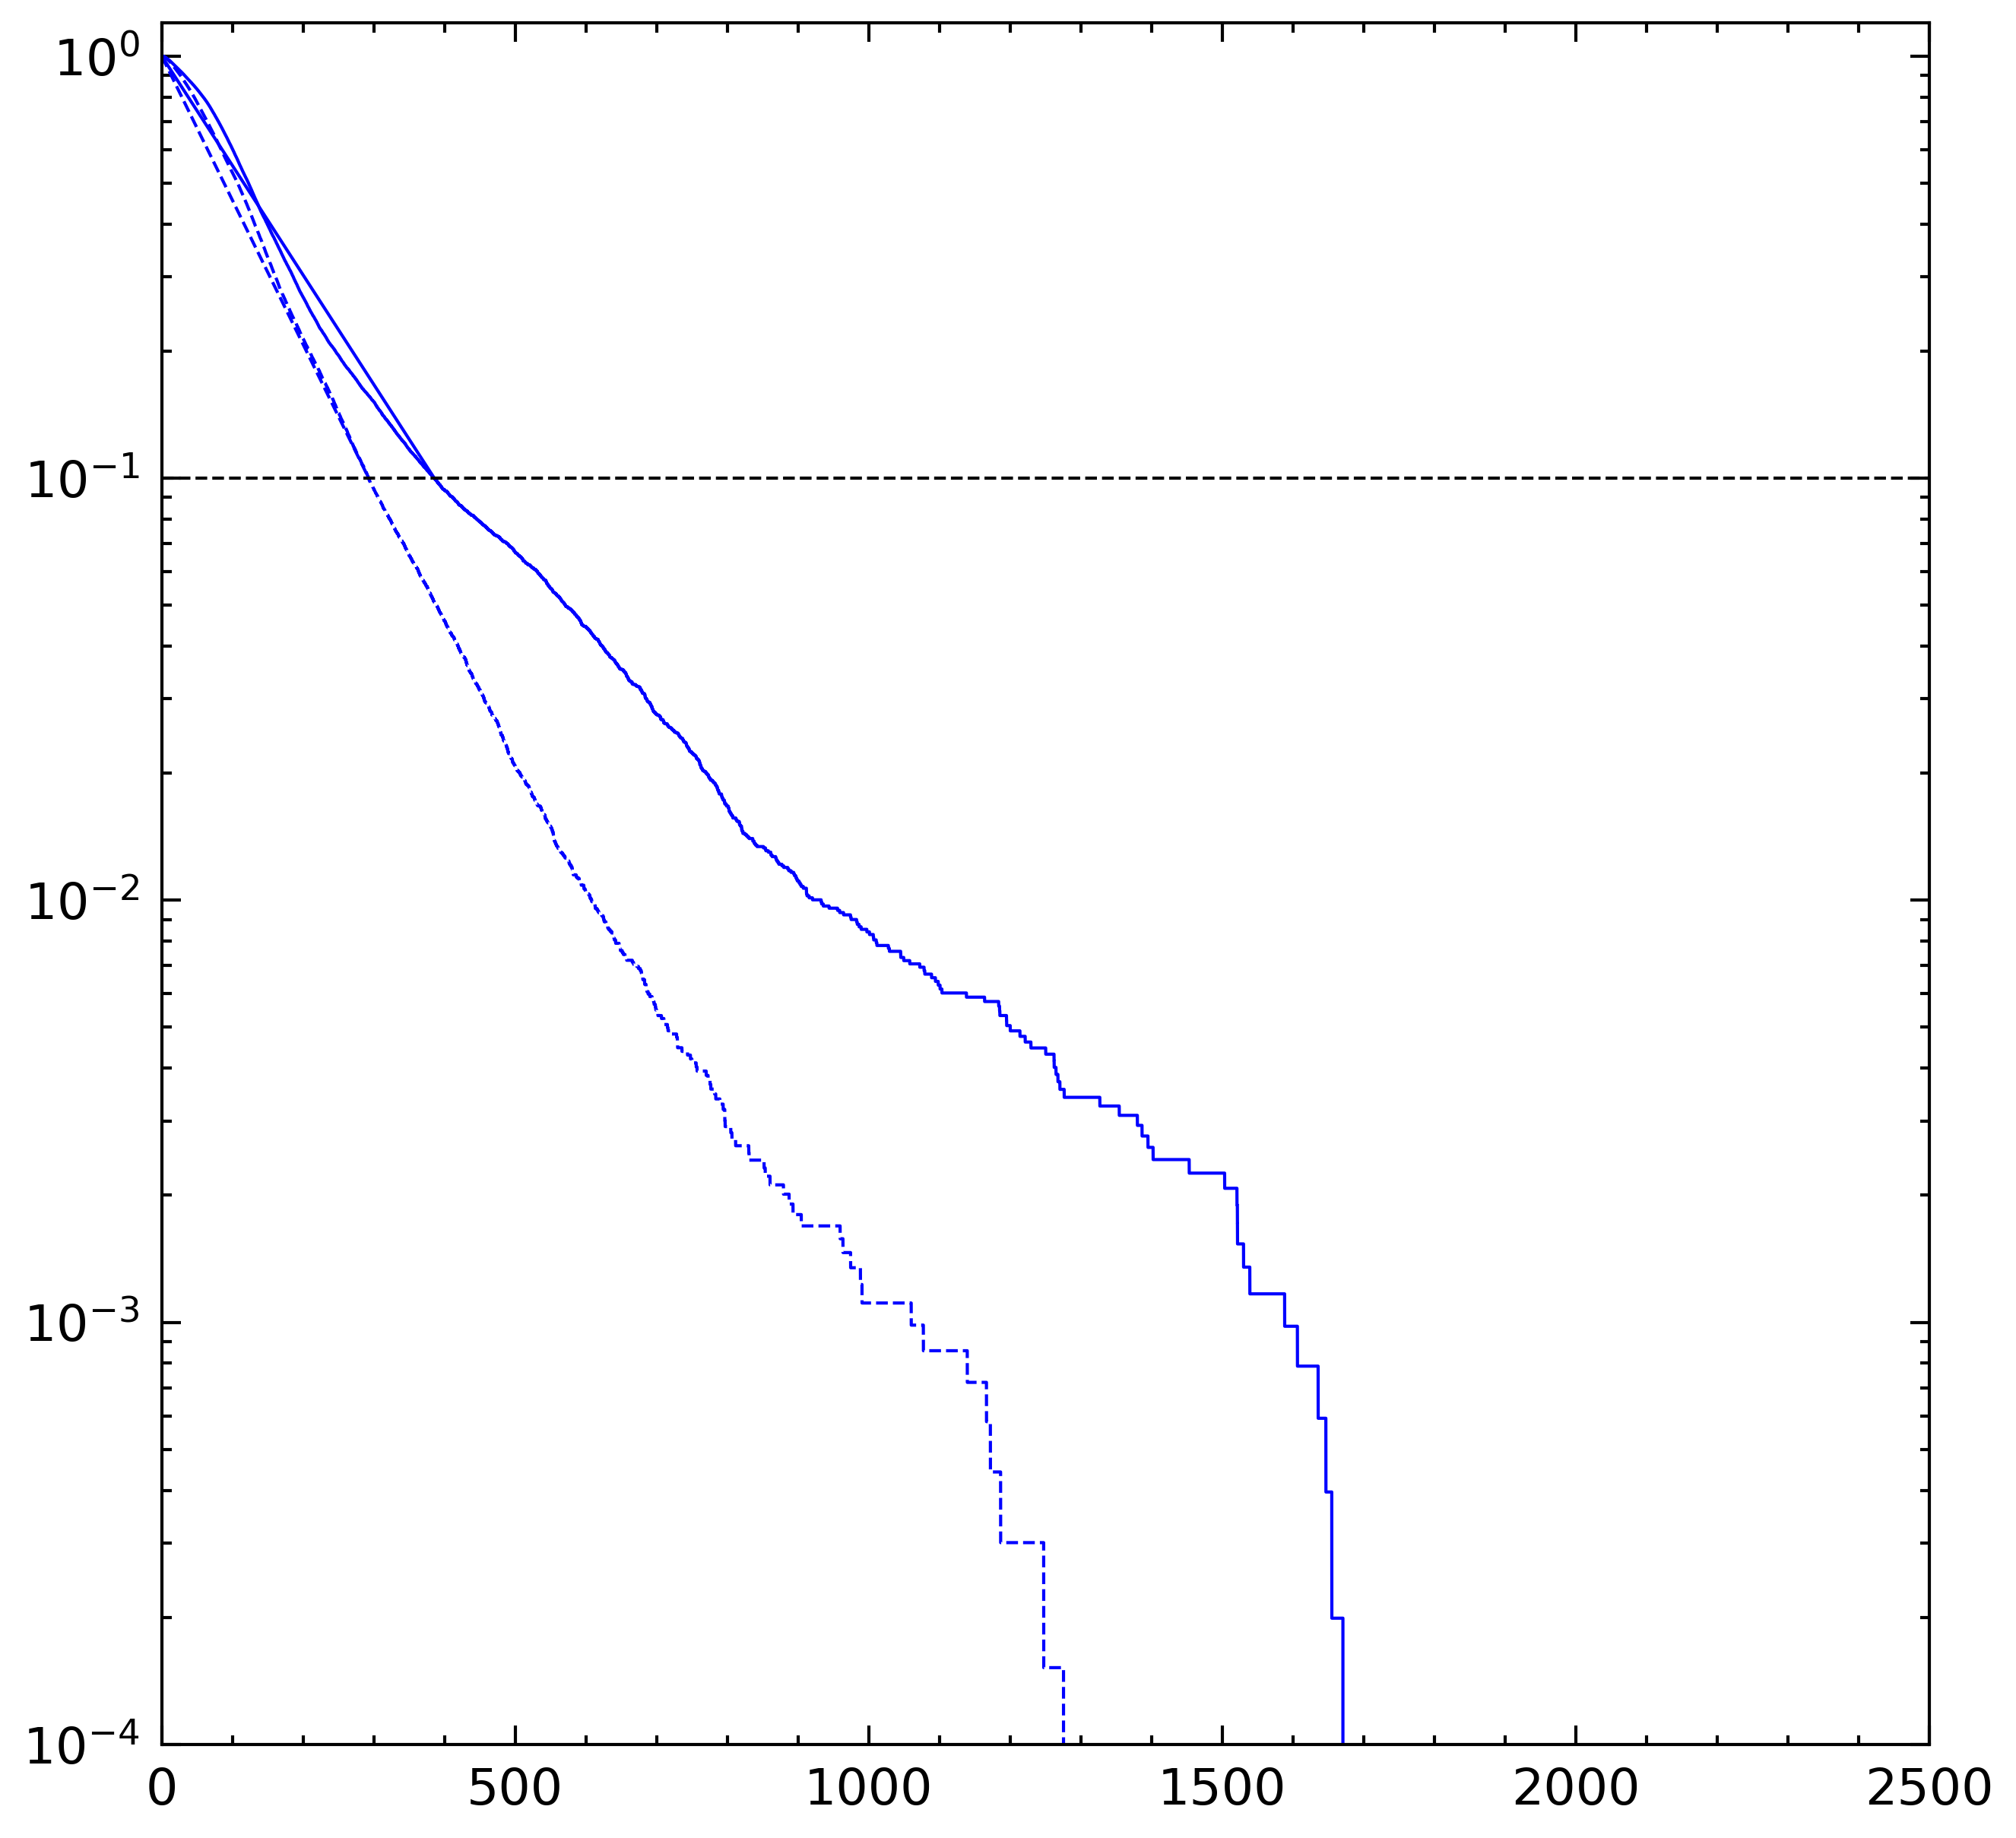

In [9]:
colors = ['blue']*2 + ['red']*2
lss = ['solid', 'dashed', 'solid', 'dashed']

for i, data in enumerate(datas):


    # The 3d data needs to be projected to calculate mcf
    binX = np.linspace(-10, 10, 961)
    binY = binX.copy()

    dx = 10/480

    den_binned = st.binned_statistic_2d(
        data['x'], data['z'], data['density'], statistic="sum", bins=[binX, binY])[0]*dx

    den_points = den_binned[den_binned > 0]


    # default bin used by the current code
    bins = np.linspace(0, 150000, int(10e5)+1) * dx
    
    # calculate the mcf, mcf slope and mcf area.
    mcf, mcf_bins = calc_mcf.calc_mcf(den_points, bins, 0, dx)
    mcf_slope, mcf_area, den10 = calc_mcf.calc_mcf_slope_and_area(mcf, mcf_bins)
    
    # plot the mcf
    plt.plot(mcf_bins, mcf, ls=lss[i], color=colors[i], lw=0.5)
    # plot the lines define mcf slope
    plt.plot([np.min(mcf_bins[mcf > 0]), 1/mcf_slope-np.min(mcf_bins[mcf > 0])],
             [1, 0.1], ls=lss[i], color=colors[i], lw=0.5)

plt.yscale('log')
plt.ylim(1e-4, 1.2)
plt.hlines(0.1, 0, 2500, ls='dashed', lw=0.5)
plt.xlim(0, 2500)
plt.show()


In [13]:
datas = calc_proj.projection(data['density'], data['bx'], data['by'], data['bz'], data['x'], data['y'], data['z'], (0, 0, 1))

In [18]:
calc_proj.projection?

Signature:
calc_proj.projection(
    den: numpy.ndarray,
    bx: numpy.ndarray,
    by: numpy.ndarray,
    bz: numpy.ndarray,
    x: numpy.ndarray,
    y: numpy.ndarray,
    z: numpy.ndarray,
    los: List[float],
) -> Tuple
Docstring:
Similar code in 'get_projection_mpi.py, but less parameters are calculated

:param den:    1D array of density
:param bx:     1D array of magnetic field x
:param by:     1D array of magnetic field y
:param bz:     1D array of magnetic field z
:param x:      1D array of x cooridinates
:param y:      1D array of y cooridinates
:param z:      1D array of z cooridinates
:param los:    Tuple[losx, losy, losx]

:return:       Tuple of physicals paramters: 
               (
                cloud_orientation, b_field_orientation,
                mcf, mcf_bin, mcf_slope, mcf_area,
                aspect_ratio, cloud_mass, min_den, max_den,
                binned_den, binned_stoke_Q, binned_stoke_U
               )
File:      /data/hinny/Scorpio_1.5_result/patch_c

In [17]:
datas

(0.057650904922952724,
 0.027807250864375955,
 array([1., 1., 1., ..., 0., 0., 0.]),
 array([1.56250000e-03, 4.68750000e-03, 7.81250000e-03, ...,
        3.12499219e+03, 3.12499531e+03, 3.12499844e+03]),
 0.00099046020594232,
 637.3805374200723,
 1.260296270237054,
 3502.896338511592,
 0.7279071455719978,
 1876.3167570903852,
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
     

In [16]:
datas.__doc__

"Built-in immutable sequence.\n\nIf no argument is given, the constructor returns an empty tuple.\nIf iterable is specified the tuple is initialized from iterable's items.\n\nIf the argument is a tuple, the return value is the same object."